**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.spatial.distance import cdist, pdist
from sklearn.neighbors import KDTree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    def fit(self, X, y):
        self.Xt = X
        self.y = y
    def predict(self, X):
        Xt = self.Xt
        y = self.y
        ans = list()
        if (self.algorithm == 'brute'):
            for i in X:
                dist = cdist(i.reshape(1, -1), Xt, metric = self.metric)
                ind = np.argsort(dist).T[:self.n_neighbors]
                ans.append(np.argmax(np.bincount(y[ind].ravel())))
        if (self.algorithm == 'kd_tree'):
            tree = KDTree(Xt)
            dist, ind = tree.query(X, self.n_neighbors)
            a = y[ind]
            for i in a:
                ans.append(np.argmax(np.bincount(i)))
        return ans    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 1.96 ms


array([0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2])

In [11]:
%time my_clf.predict(X_test)

Wall time: 997 µs


[0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2]

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 10 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1])

In [17]:
%time my_clf.predict(X_test)

Wall time: 981 µs


[0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1]

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
vectorizer =  TfidfVectorizer(max_features = 20)
a = vectorizer.fit_transform(data)
a = a.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
#sklearn.cross_validation не работал
X_train, X_test, y_train, y_test = train_test_split(a, target, test_size=0.33, random_state=31)

In [23]:
clf = KNeighborsClassifier(n_neighbors=10,metric='cosine')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
accuracy_score(y_test, clf_pred)

0.13417246920192824

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

[0.11194429566148902,
 0.10524906266738082,
 0.10819496518478842,
 0.11542581681842529,
 0.11006963042313872,
 0.1164970540974826,
 0.11730048205677558,
 0.1164970540974826,
 0.1280128548473487,
 0.12667380824852706]

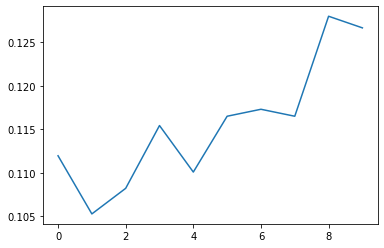

In [25]:
score = list()
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, metric='cosine')
    my_clf.fit(X_train, y_train)
    my_clf_pred = my_clf.predict(X_test)
    score.append(accuracy_score(y_test, my_clf_pred))
    X_train, X_test, y_train, y_test = train_test_split(a, target, test_size=0.33, random_state=i+40)
plt.plot(score)
score

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [26]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [27]:
test_data = newsgroups['data']
test_target = newsgroups['target']
vectorizer =  TfidfVectorizer(max_features = 30000)
a = vectorizer.fit_transform(test_data)
a = a.toarray()
clf = KNeighborsClassifier(n_neighbors=10, metric='cosine')
clf.fit(a, test_target)
test = vectorizer.transform(test_data)
test = test.toarray()
clf_pred = clf.predict(test)
accuracy_score(test_target, clf_pred)

0.7140201805629315